In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tikzplotlib
from markovflow.sde.sde import PriorDoubleWellSDE

from docs.sde.sde_exp_utils import bitmappify

2022-08-11 11:26:24.581663: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-11 11:26:24.581697: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-08-11 11:26:26.319114: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-08-11 11:26:26.324132: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-08-11 11:26:26.347687: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-08-11 11:26:26.347731: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: verma
2022-08-11 11:26:26.347741: I tensorflow/stream_execut

In [2]:
seed_id = 33
main_dir = r"../data/gpu_training/" + str(seed_id)

generate_tex = False
output_dir = r"fig/DW/" + str(seed_id)

if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    
extra_axis_parameters = ["axis x line=bottom", "axis y line=left"]

In [3]:
def list_to_str(lst):
    return str(lst).replace("[", "{").replace("]", "}")

## Plot learning

In [14]:
ssm_1_path = os.path.join(main_dir, "learning_0.01", "ssm_m_step.npz")
ssm_5_path = os.path.join(main_dir, "learning_0.005", "ssm_m_step.npz")
ssm_01_path = os.path.join(main_dir, "learning_0.001", "ssm_m_step.npz")

ssm_1_a = np.load(ssm_1_path)["a"]
ssm_1_c = np.load(ssm_1_path)["c"]

ssm_5_a = np.load(ssm_5_path)["a"]
ssm_5_c = np.load(ssm_5_path)["c"]

ssm_01_a = np.load(ssm_01_path)["a"]
ssm_01_c = np.load(ssm_01_path)["c"]

In [15]:
vgp_1_path = os.path.join(main_dir, "learning_0.01", "vgp_m_step.npz")
vgp_5_path = os.path.join(main_dir, "learning_0.005", "vgp_m_step.npz")
vgp_01_path = os.path.join(main_dir, "learning_0.001", "vgp_m_step.npz")

vgp_1_a = np.load(vgp_1_path)["a"]
vgp_1_c = np.load(vgp_1_path)["c"]

vgp_5_a = np.load(vgp_5_path)["a"]
vgp_5_c = np.load(vgp_5_path)["c"]

vgp_01_a = np.load(vgp_01_path)["a"]
vgp_01_c = np.load(vgp_01_path)["c"]

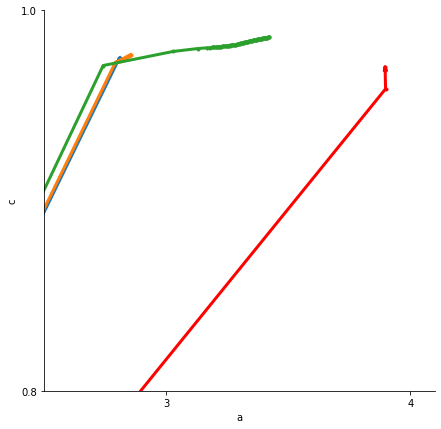

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

plt.plot(ssm_1_a, ssm_1_c, ".-", label="t-VGP", linewidth=3., color="red")
plt.plot(vgp_1_a, vgp_1_c, ".-", label="VGP (dt=0.01)", linewidth=3.)
plt.plot(vgp_5_a, vgp_5_c, ".-", label="VGP (dt=0.005)", linewidth=3.)
plt.plot(vgp_01_a, vgp_01_c, ".-", label="VGP (dt=0.001)", linewidth=3.)

axis_parameters = extra_axis_parameters.copy()

if seed_id==12:
    x_ticks = [1.0, 1.5, 2.1]
    y_ticks = [0.5, 0.7, 0.9]
elif seed_id==33:
    x_ticks = [1, 2, 3, 4]
    y_ticks = [0.6, 0.8, 1.0]
    
plt.xticks(x_ticks)
plt.yticks(y_ticks)

axis_parameters.append("xtick="+list_to_str(x_ticks))
axis_parameters.append("ytick="+list_to_str(y_ticks))

    
# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

if seed_id==12:
    plt.xlim([0.95, 2.2])
    plt.ylim([0.49, 0.95])

elif seed_id==33:
    plt.xlim([2.5, 4.1])
    plt.ylim([0.8, 1.0])
    
plt.xlabel("a")
plt.ylabel("c")


# plt.legend()

if generate_tex:
    tikzplotlib.save(os.path.join(output_dir, 'm_step.tex'), figure=fig, axis_width="\\figurewidth",
                 axis_height="\\figureheight", extra_axis_parameters=axis_parameters)
    
plt.show()


## Plot Drift

In [7]:
ssm_1_path = os.path.join(main_dir, "learning_0.01", "ssm_learnt_sde.npz")

ssm_1_a = np.load(ssm_1_path)["a"][-1]
ssm_1_c = np.load(ssm_1_path)["c"][-1]


In [8]:
vgp_1_path = os.path.join(main_dir, "learning_0.01", "vgp_learnt_sde.npz")
vgp_5_path = os.path.join(main_dir, "learning_0.005", "vgp_learnt_sde.npz")
vgp_01_path = os.path.join(main_dir, "learning_0.001", "vgp_learnt_sde.npz")

vgp_1_a = np.load(vgp_1_path)["a"][-1]
vgp_1_c = np.load(vgp_1_path)["c"][-1]

vgp_5_a = np.load(vgp_5_path)["a"][-1]
vgp_5_c = np.load(vgp_5_path)["c"][-1]

vgp_01_a = np.load(vgp_01_path)["a"][-1]
vgp_01_c = np.load(vgp_01_path)["c"][-1]

In [9]:
ssm_sde = PriorDoubleWellSDE(initial_a_val=ssm_1_a, initial_c_val=ssm_1_c)

vgp_1_sde = PriorDoubleWellSDE(initial_a_val=vgp_1_a, initial_c_val=vgp_1_c)
vgp_5_sde = PriorDoubleWellSDE(initial_a_val=vgp_5_a, initial_c_val=vgp_5_c)
vgp_01_sde = PriorDoubleWellSDE(initial_a_val=vgp_01_a, initial_c_val=vgp_01_c)

true_sde = PriorDoubleWellSDE(initial_a_val=4., initial_c_val=1.)

In [10]:
x = np.linspace(-2, 2, 50).reshape((-1, 1))

ssm_drift = ssm_sde.drift(x, t=None)

vgp_1_drift = vgp_1_sde.drift(x, t=None)
vgp_5_drift = vgp_5_sde.drift(x, t=None)
vgp_01_drift = vgp_01_sde.drift(x, t=None)

true_drift = true_sde.drift(x, t=None)

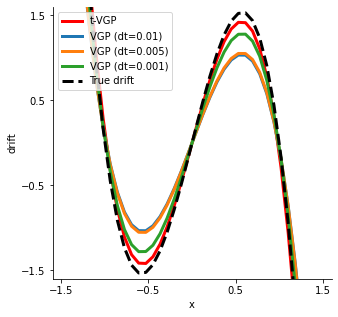

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

plt.plot(x, ssm_drift, label="t-VGP", linewidth=3., color="red")
plt.plot(x, vgp_1_drift, label="VGP (dt=0.01)", linewidth=3.)
plt.plot(x, vgp_5_drift, label="VGP (dt=0.005)", linewidth=3.)
plt.plot(x, vgp_01_drift, label="VGP (dt=0.001)", linewidth=3.)
plt.plot(x, true_drift, label="True drift", linewidth=3., color="black", linestyle="dashed")


axis_parameters = extra_axis_parameters.copy()

x_ticks = [-1.5, -0.5, 0.5, 1.5]
y_ticks = [-1.5, -0.5, 0.5, 1.5]

plt.xticks(x_ticks)
plt.yticks(y_ticks)

axis_parameters.append("xtick="+list_to_str(x_ticks))
axis_parameters.append("ytick="+list_to_str(y_ticks))

    
# Hide the right and top spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

plt.xlim([-1.6, 1.6])
plt.ylim([-1.6, 1.6])

plt.xlabel("x")
plt.ylabel("drift")

plt.legend()

if generate_tex:
    tikzplotlib.save(os.path.join(output_dir, 'learnt_drift.tex'), figure=fig, axis_width="\\figurewidth",
                 axis_height="\\figureheight", extra_axis_parameters=axis_parameters)
    
plt.show()
